In [2]:
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

Let's introduce the Pauli Matrixes for the projections purposes, indeed they would be used in order to caracterise the resulting state of a mesurement

In [ ]:
Id = np.matrix([[1 , 0],[0 , 1]])
sx = np.matrix([[0 , 1] , [1 , 0]])
sy = np.matrix([[0 , -1j] , [1j , 0]])
sz = np.matrix([[1,0] , [0,-1]])


In [ ]:
ni = 10
nx = 10
ny = 10
nz = 10

In [3]:
def Likelyhood(rho, list_Mesure, list_instance):
    prod = 1
    N = len(list_instance)
    for i in range(N):
        prod *= np.trace(np.matmul(rho, list_Mesure[i]) ) ^ list_instance[i]
    return prod

In [4]:
def Likelyhood_r(r, list_Mesure, list_instance):
    prod = 1
    N = len(list_instance)
    sx = np.matrix([[0 , 1] , [1 , 0]])
    sy = np.matrix([[0 , -1j] , [1j , 0]])
    sz = np.matrix([[1,0] , [0,-1]])
    s = [sx, sy, sz]
    rho = np.matrix([[1 , 0],[0 , 1]])/2 + r[0]*sx /2 + r[1]*sy/2 + r[2]*sz/2 
    for i in range(N):
        prod *= np.trace(np.matmul(rho, list_Mesure[i]) ) **  list_instance[i]
    return prod

In [ ]:
np.trace(np.matmul(np.matrix([[0 , -1j] , [1j , 0]]), np.matrix([[1 , 0],[0 , 0]])) ) **5

0j

In [5]:
def MCMC_naif( list_Mesure, list_instance, N, var, r0 ):
    parcour = [ [0,0,0] for k in range(N)]
    r = r0/np.linalg.norm(r0, ord=None, axis=None, keepdims=False)
    Likely = Likelyhood_r(r, list_Mesure, list_instance)
    Acceptance_count = 0 # to count in the end the acceptance rate
    for i in range(N):
        parcour[i] = r # at each iteration I store the vector r
        dr = np.random.normal(loc=0.0, scale=var, size=(1,3)) # infenitisimal shift
        r2 = r + dr[0] # I need to put dr[0] to conserve the array shape, indeed dr is a matrix(1,3)
        r2 = r2/np.linalg.norm(r2, ord=None, axis=None, keepdims=False)
        Lik2 = Likelyhood_r(r2, list_Mesure, list_instance)
        ratio = Lik2/Likely 
        U = np.random.uniform(low=0.0, high=1.0, size=None)
        if U < ratio:  #I shift the position according to the MH algorithm
            r = r2
            Likely = Lik2
            Acceptance_count += 1
    return parcour, Acceptance_count/N


In [8]:
list,rate = MCMC_naif([np.matrix([[1 , 0],[0 , 0]]),np.matrix([[0 , 0],[0 , 1]])], [100, 100], 5000, 0.4, [1,0,0])

In [10]:
list,rate = MCMC_naif([np.matrix([[1/2 , 1/2],[1/2 , 1/2]]),np.matrix([[1/2 , -1/2],[-1/2 , 1/2]])], [100, 100], 5000, 1, [0.5,0.5,0.5])

In [17]:
list,rate = MCMC_naif([np.matrix([[1/2 , 1/2],[1/2 , 1/2]]),np.matrix([[1/2 , -1/2],[-1/2 , 1/2]]),np.matrix([[1 , 0],[0 , 0]]),np.matrix([[0 , 0],[0 , 1]])], [30,30,30,30], 5000, 2, [0.5,0.5,0.5])

You can play with the var parameter, in order to have a good mix in the MCMC

In [10]:
print(list)

[array([0.57735027, 0.57735027, 0.57735027]), array([0.57735027, 0.57735027, 0.57735027]), array([0.57735027, 0.57735027, 0.57735027]), array([0.57735027, 0.57735027, 0.57735027]), array([0.57735027, 0.57735027, 0.57735027]), array([0.57735027, 0.57735027, 0.57735027]), array([ 0.06930821,  0.78490056, -0.61573329]), array([0.48144089, 0.7624905 , 0.43223014]), array([0.48144089, 0.7624905 , 0.43223014]), array([0.48144089, 0.7624905 , 0.43223014]), array([ 0.53959907,  0.8209649 , -0.18668014]), array([ 0.53959907,  0.8209649 , -0.18668014]), array([ 0.53959907,  0.8209649 , -0.18668014]), array([ 0.37452883,  0.88352744, -0.2812604 ]), array([ 0.37452883,  0.88352744, -0.2812604 ]), array([ 0.37452883,  0.88352744, -0.2812604 ]), array([-0.14177195,  0.95073739, -0.27567938]), array([-0.14177195,  0.95073739, -0.27567938]), array([-0.14177195,  0.95073739, -0.27567938]), array([-0.23076837,  0.96189315,  0.14665445]), array([-0.23076837,  0.96189315,  0.14665445]), array([-0.23076837

In [14]:
print(rate)

0.0422


In [ ]:
z = [list[i][2] for i in range(Burn,N)]
x = [list[i][0] for i in range(Burn,N)]
y = [list[i][1] for i in range(Burn,N)]

np.mean(x),np.mean(y),np.mean(z)

(-0.002616847456255577, -0.06238472150749291, -0.135566441619018)

Now let plot the point on a sphere

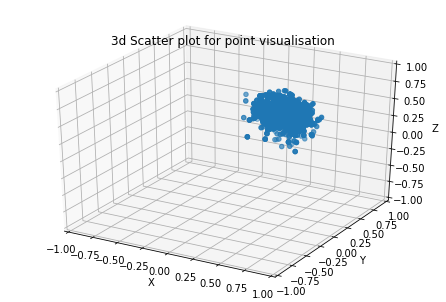

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')
 
# syntax for 3-D projection
"""for i in range(len(list)):
  z = list[i][2]
  x = list[i][0]
  y = list[i][1]
  ax.scatter(x, y, z)"""
N = len(list)
Burn = 1000

z = [list[i][2] for i in range(Burn,N)]
x = [list[i][0] for i in range(Burn,N)]
y = [list[i][1] for i in range(Burn,N)]
ax.scatter(x, y, z)
 
# syntax for plotting
ax.set_title('3d Scatter plot for point visualisation')
plt.show()

(0, 0.0, 0)
(0, 0.00025, 0)
(0, 0.0005, 0)
(0, 0.00075, 0)
(0, 0.001, 0)
(0, 0.00125, 0)
(0, 0.0015, 0)
(0, 0.00175, 0)
(0, 0.002, 0)
(0, 0.00225, 0)
(0, 0.0025, 0)
(0, 0.00275, 0)
(0, 0.003, 0)
(0, 0.00325, 0)
(0, 0.0035, 0)
(0, 0.00375, 0)
(0, 0.004, 0)
(0, 0.00425, 0)
(0, 0.0045, 0)
(0, 0.00475, 0)
(0, 0.005, 0)
(0, 0.00525, 0)
(0, 0.0055, 0)
(0, 0.00575, 0)
(0, 0.006, 0)
(0, 0.00625, 0)
(0, 0.0065, 0)
(0, 0.00675, 0)
(0, 0.007, 0)
(0, 0.00725, 0)
(0, 0.0075, 0)
(0, 0.00775, 0)
(0, 0.008, 0)
(0, 0.00825, 0)
(0, 0.0085, 0)
(0, 0.00875, 0)
(0, 0.009, 0)
(0, 0.00925, 0)
(0, 0.0095, 0)
(0, 0.00975, 0)
(0, 0.01, 0)
(0, 0.01025, 0)
(0, 0.0105, 0)
(0, 0.01075, 0)
(0, 0.011, 0)
(0, 0.01125, 0)
(0, 0.0115, 0)
(0, 0.01175, 0)
(0, 0.012, 0)
(0, 0.01225, 0)
(0, 0.0125, 0)
(0, 0.01275, 0)
(0, 0.013, 0)
(0, 0.01325, 0)
(0, 0.0135, 0)
(0, 0.01375, 0)
(0, 0.014, 0)
(0, 0.01425, 0)
(0, 0.0145, 0)
(0, 0.01475, 0)
(0, 0.015, 0)
(0, 0.01525, 0)
(0, 0.0155, 0)
(0, 0.01575, 0)
(0, 0.016, 0)
(0, 0.01625, 

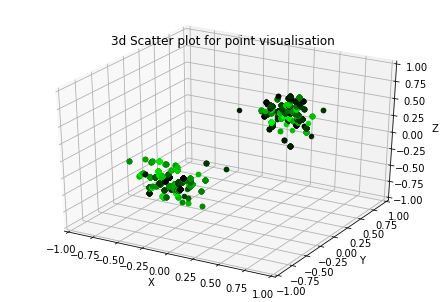

In [29]:
#plot with color
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
 
fig = plt.figure()
ax = p3.Axes3D(fig)
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

N = len(list)
Burn = 1000
 
# syntax for 3-D projection
for i in range(Burn, N):
  c = (0, (i-Burn)/(N-Burn), 0)
  print(c)
  z = list[i][2]
  x = list[i][0]
  y = list[i][1]
  ax.scatter(x, y, z, color = c)


# syntax for plotting
ax.set_title('3d Scatter plot for point visualisation')
plt.show()

In the section, given the path followed by the MCMC, I aim to make a gif in order to visualise the plot distribution througt time